In [1]:
import pandas as pd
import nest_asyncio             
import matplotlib.pyplot as plt
from utilities import clean_tweet, create_bank_col
#Reading data and models
import glob                     
import os
import pickle
import re
import numpy as np
import datetime as dt
import seaborn as sns

In [3]:
# Read the path
dir_datasets = os.getenv("DATASETS_PATH")
directory = f"{dir_datasets}/tweets_of_the_top_5_banks_in_SA/"

# Use os.listdir() to get a list of all files in the directory
files = os.listdir(directory)

# Use a list comprehension to filter out only CSV files
csv_files = [file for file in files if file.endswith(".csv")]

# Initialize an empty list to store the dataframes
df_list = []

# Iterate over the CSV files and read them into pandas dataframes
for file in csv_files:
    file_path = os.path.join(directory, file)
    df = pd.read_csv(file_path)
    df_list.append(df)

# Concatenate the dataframes
tweets_df = pd.concat(df_list)

/tmp/ipykernel_7422/1788197953.py:17: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [4]:
# Create a new column 'year' from the 'date' column
tweets_df['year'] = pd.DatetimeIndex(tweets_df['date']).year

# Group the dataframe by year
grouped_df = tweets_df.groupby(['year'])

# Use the size() function to get the number of indexes per year
indexes_per_year = grouped_df.size().reset_index(name='counts')

# Print the result
print(indexes_per_year)


   year  counts
0  2019  297949
1  2020  376540
2  2021  411240


In [5]:
print(tweets_df['base_tweet'].head(10).values)

['@magefalco Let me know when you would like to play against my cheesy absa'
 '@Thabiso_TK Happy birthday to the handsome msushwana. 😂😂😂May he grow up and be protected and blessed. May he also stay far away from teams that have been knockout out of the Nedbank cup.'
 '@SbuMasang JZ will give us Nedbank Cup.  And next season the league'
 'This is result of SA Nedbank cup   ———————————————————— 6 February 2021 JDR Stars vs Pretoria University Fc 2-1 JDR Stars won  Orlando Pirates vs Uthongathi FC  1-0 Orlando Pirates won  TS Galaxy vs TS Sporting  0(4)-0(5) TS sporting won the game with Penalty ￼'
 '@Radebe_merci Invest bank &amp; Absa'
 '@StandardBankZA @kulanicool @Nedbank @FNBSA @CapitecBankSA Thank you 🙏 will do.'
 'Nedbank Cup: Twitter reacts to Orlando Pirates’ narrow win over Uthongathi\xa0FC  https://t.co/EzVO9A80V7'
 'Pirates, Cape Town City and AmaZulu advance to Nedbank Cup last\xa016  https://t.co/CDFWo48z0F'
 "@Radebe_merci Daaaym I thought I'm weird I use FNB, NEDBANK and C

In [6]:
# Apply the clean_tweet function to the base_tweet column
cleaned_tweets, hashtags = clean_tweet(tweets_df['base_tweet'])
# Add the cleaned tweets and hashtags columns to the dataframe
tweets_df['clean_tweet'] = cleaned_tweets
tweets_df['hashtags'] = hashtags

In [7]:
print(tweets_df['clean_tweet'].head(10).values)

['Let me know when you would like to play against my cheesy absa'
 'Happy birthday to the handsome msushwana. May he grow up and be protected and blessed. May he also stay far away from teams that have been knockout out of the Nedbank cup.'
 'JZ will give us Nedbank Cup. And next season the league'
 'This is result of SA Nedbank cup 6 February 2021 JDR Stars vs Pretoria University Fc 2-1 JDR Stars won Orlando Pirates vs Uthongathi FC 1-0 Orlando Pirates won TS Galaxy vs TS Sporting 0(4)-0(5) TS sporting won the game with Penalty'
 'Invest bank &amp; Absa' 'Thank you will do.'
 'Nedbank Cup: Twitter reacts to Orlando Pirates narrow win over UthongathiFC'
 'Pirates, Cape Town City and AmaZulu advance to Nedbank Cup last16'
 "Daaaym I thought I'm weird I use FNB, NEDBANK and Capitec"
 '#itcanbe #bankmysummer #januworry Have a beautiful night']


In [8]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085729 entries, 0 to 376539
Data columns (total 42 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Unnamed: 0       1085729 non-null  int64  
 1   id               1085729 non-null  float64
 2   conversation_id  1085729 non-null  float64
 3   created_at       1085729 non-null  float64
 4   date             1085729 non-null  object 
 5   timezone         1085729 non-null  int64  
 6   place            964 non-null      object 
 7   base_tweet       1085729 non-null  object 
 8   cleaned_tweet    1001735 non-null  object 
 9   language         1085729 non-null  object 
 10  hashtags         1085729 non-null  object 
 11  cashtags         1085729 non-null  object 
 12  user_id          1085729 non-null  float64
 13  user_id_str      1085729 non-null  float64
 14  username         1085729 non-null  object 
 15  name             1085687 non-null  object 
 16  day              10

In [9]:
print(tweets_df[['language', 'hashtags', 'cashtags']].head(100))
print(tweets_df['language'].unique())
# remove all rows where language is not english or undefined
tweets_df = tweets_df[tweets_df["language"].isin(['en'])]
print(tweets_df['language'].unique())

   language hashtags cashtags
0        en       []       []
1        en       []       []
2        en       []       []
3        en       []       []
4        en       []       []
..      ...      ...      ...
95       en       []       []
96      und       []       []
97       en       []       []
98       en       []       []
99       en       []       []

[100 rows x 3 columns]
['en' 'und']
['en']


In [10]:
queary_result = tweets_df.query("language == 'und'")
und_tweets = queary_result['clean_tweet'].values
print(queary_result['clean_tweet'].count())

0


In [11]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 982194 entries, 0 to 376539
Data columns (total 42 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       982194 non-null  int64  
 1   id               982194 non-null  float64
 2   conversation_id  982194 non-null  float64
 3   created_at       982194 non-null  float64
 4   date             982194 non-null  object 
 5   timezone         982194 non-null  int64  
 6   place            946 non-null     object 
 7   base_tweet       982194 non-null  object 
 8   cleaned_tweet    982120 non-null  object 
 9   language         982194 non-null  object 
 10  hashtags         982194 non-null  object 
 11  cashtags         982194 non-null  object 
 12  user_id          982194 non-null  float64
 13  user_id_str      982194 non-null  float64
 14  username         982194 non-null  object 
 15  name             982152 non-null  object 
 16  day              982194 non-null  int6

In [12]:
tweets_df[['clean_tweet', 'username', 'name', 'language', 'nlikes']].sort_values(by='nlikes', ascending=False).head(5).values

array([["STANDARD BANK JUST DONATED R 1 000 000.00 TO #R10GoesALongWay THE TOTAL IS R2 000 000.00! OH MY GOSHSSSSSS!!!!! SOUTH AFRICA WE RAISED 2 MILLION RAND FOR STUDENTS I DON'T KNOW HOW TO REACT!!! 2 MILLION !!! WHAT!!! THANK YOU THANK YOU THANK YOU WHAT!",
        'lasizwe', 'Lasizwe', 'en', 25276],
       ['My life is forever busy, moving from meeting to meeting, casting to film set, so having convenient and safe places to get cash on the go works for me. #LoveFNB',
        'TerryPheto', 'Terry Pheto', 'en', 21071],
       ['Celebrating my last day at Standard Bank on Simmonds,there will be a new guy starting work this side on Monday. I will be heading off to discover a new clientele at the SABC studios in Auckland Park,I pray everything goes well Please RT so all those in Auckland can cav',
        'sandwich_kiing', 'Itumeleng Lekomanyane', 'en', 13679],
       ['#CountryDuty Special shout out to who just called show on and offered to double whatever Wiseman has received thus far

In [13]:
tweets_df = tweets_df.drop(['Unnamed: 0','created_at', 'user_id_str', 'link', 'urls', 'photos', 'video',
       'thumbnail', 'retweet', 'quote_url', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'retweet_date', 'translate', 'trans_src',
       'trans_dest', 'year', 'language', 'search', 'cashtags', 'cleaned_tweet', 'timezone', 'reply_to'],axis = 1)


In [14]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 982194 entries, 0 to 376539
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               982194 non-null  float64
 1   conversation_id  982194 non-null  float64
 2   date             982194 non-null  object 
 3   place            946 non-null     object 
 4   base_tweet       982194 non-null  object 
 5   hashtags         982194 non-null  object 
 6   user_id          982194 non-null  float64
 7   username         982194 non-null  object 
 8   name             982152 non-null  object 
 9   day              982194 non-null  int64  
 10  hour             982194 non-null  int64  
 11  nlikes           982194 non-null  int64  
 12  nreplies         982194 non-null  int64  
 13  nretweets        982194 non-null  int64  
 14  clean_tweet      982194 non-null  object 
dtypes: float64(3), int64(5), object(7)
memory usage: 119.9+ MB


In [15]:
# remove rows where username is in bank_search
tweets_df = tweets_df[ ~tweets_df["username"].str.lower().str.contains('fnb|standardbank|nedbank|absa|capitec',regex = True)]

In [16]:
type(tweets_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 982194 entries, 0 to 376539
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               982194 non-null  float64
 1   conversation_id  982194 non-null  float64
 2   date             982194 non-null  object 
 3   place            946 non-null     object 
 4   base_tweet       982194 non-null  object 
 5   hashtags         982194 non-null  object 
 6   user_id          982194 non-null  float64
 7   username         982194 non-null  object 
 8   name             982152 non-null  object 
 9   day              982194 non-null  int64  
 10  hour             982194 non-null  int64  
 11  nlikes           982194 non-null  int64  
 12  nreplies         982194 non-null  int64  
 13  nretweets        982194 non-null  int64  
 14  clean_tweet      982194 non-null  object 
dtypes: float64(3), int64(5), object(7)
memory usage: 119.9+ MB


NoneType

In [17]:
tweets_df["base_tweet"] = tweets_df["base_tweet"].astype(str)
tweets_df["clean_tweet"] = tweets_df["clean_tweet"].astype(str)
tweets_df["date"] = pd.to_datetime(tweets_df["date"])
type(tweets_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 982194 entries, 0 to 376539
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   id               982194 non-null  float64       
 1   conversation_id  982194 non-null  float64       
 2   date             982194 non-null  datetime64[ns]
 3   place            946 non-null     object        
 4   base_tweet       982194 non-null  object        
 5   hashtags         982194 non-null  object        
 6   user_id          982194 non-null  float64       
 7   username         982194 non-null  object        
 8   name             982152 non-null  object        
 9   day              982194 non-null  int64         
 10  hour             982194 non-null  int64         
 11  nlikes           982194 non-null  int64         
 12  nreplies         982194 non-null  int64         
 13  nretweets        982194 non-null  int64         
 14  clean_tweet      982

NoneType

In [18]:
tweets_df["Bank"] = ""
tweets_df["Bank"] = tweets_df[["base_tweet","Bank"]].apply(create_bank_col, axis =1 )

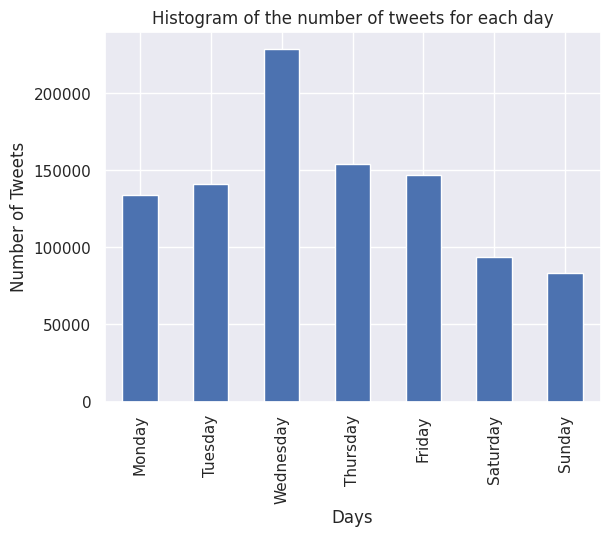

In [19]:
# Plot the number of tweets per day
days_dict = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday', 7: 'Sunday'}
day_counts = tweets_df.groupby('day').size().reset_index(name='counts')
day_counts = day_counts.sort_values(by='day')
day_counts = day_counts.set_index('day')
day_counts.index = day_counts.index.map(days_dict)
day_counts.plot.bar(legend=False)
plt.xlabel('Days')
plt.ylabel('Number of Tweets')
plt.title('Histogram of the number of tweets for each day')
plt.show()

In [20]:
# Sort by number of liks, replies and retweets
print(tweets_df[['clean_tweet', 'nlikes', 'nreplies', 'nretweets']].sort_values(by='nreplies', ascending=False).head(5).values)

[["I have been an customer for almost 22 years. They have seen my conduct financially, but when I need their assistance they turn their back on me. Time and time again. What is the point of building a relationship with service providers if it's just easy for them to drop you?"
  7232 1064 1558]
 ['WIN R500 with ! Which family will make it through to Fast Money tonight on #FamilyFeudSA? Comment with your answer and you could WIN R500 thanks to Standard Bank!! (x5 winners) #FamilyFeudAfrica #ItCanBe #PureSave #etvonline #RapidBluetv'
  573 956 294]
 ['WIN R500 with ! Which family will make it through to Fast Money tonight on #FamilyFeudSA? Comment with your answer and you could WIN R500 thanks to Standard Bank!! (x5 winners) #FamilyFeudAfrica #ItCanBe #PureSave #etvonline #RapidBluetv'
  507 954 263]
 ['So will be giving away R10 000 EVERY week! 1. Follow 2. Start with My dream is... &amp; share what your biggest dream is 3. Use the hashtag #ItCanBe Let them kickstart your dream because 

In [21]:
tweets_df[['clean_tweet']].head(5).values

array([['Let me know when you would like to play against my cheesy absa'],
       ['Happy birthday to the handsome msushwana. May he grow up and be protected and blessed. May he also stay far away from teams that have been knockout out of the Nedbank cup.'],
       ['JZ will give us Nedbank Cup. And next season the league'],
       ['This is result of SA Nedbank cup 6 February 2021 JDR Stars vs Pretoria University Fc 2-1 JDR Stars won Orlando Pirates vs Uthongathi FC 1-0 Orlando Pirates won TS Galaxy vs TS Sporting 0(4)-0(5) TS sporting won the game with Penalty'],
       ['Invest bank &amp; Absa']], dtype=object)

In [22]:
# tweets_df.to_csv('full_tweets.csv', index=False)

In [23]:
tweets_df.columns

Index(['id', 'conversation_id', 'date', 'place', 'base_tweet', 'hashtags',
       'user_id', 'username', 'name', 'day', 'hour', 'nlikes', 'nreplies',
       'nretweets', 'clean_tweet', 'Bank'],
      dtype='object')

In [24]:
print('length of data is', len(tweets_df))
print(f'Shape of data: {tweets_df.shape}')

length of data is 982194
Shape of data: (982194, 16)


In [25]:
tweets_df.dtypes

id                        float64
conversation_id           float64
date               datetime64[ns]
place                      object
base_tweet                 object
hashtags                   object
user_id                   float64
username                   object
name                       object
day                         int64
hour                        int64
nlikes                      int64
nreplies                    int64
nretweets                   int64
clean_tweet                object
Bank                       object
dtype: object

In [26]:
np.sum(tweets_df.isnull().any(axis=1))

981248